<a href="https://colab.research.google.com/github/jeevitha16ds/jeevitha16ds/blob/main/Feature_selection_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Feature Selection: Select a subset of input features from the dataset.
#### 1. Unsupervised: Do not use the target variable (e.g. remove redundant variables).
####        1.1 Correlation
####  2.Supervised: Use the target variable (e.g. remove irrelevant variables).
####        2.1 Wrapper: Search for well-performing subsets of features.
#####              2.1.1 RFE
####        2.3 Filter: Select subsets of features based on their relationship with the target.
#####              2.3.1 Statistical Methods
#####              2.3.2 Feature Importance Methods
####        2.4 Intrinsic: Algorithms that perform automatic feature selection during training.
#####             2.4.1 Decision Trees
### 2. Dimensionality Reduction: Project input data into a lower-dimensional feature space.

![feature_selection_methods.png](attachment:feature_selection_methods.png)

In [ ]:

#

import pandas as pd
import numpy as np



url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
####[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]

dataframe = pd.read_csv(url, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [ ]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 3, verbose=1)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


In [ ]:
# feature importance


# plot feature importance manually
import pandas as pd
from xgboost import XGBClassifier
from matplotlib import pyplot
# load data
dataset = pd.read_csv('diabetes.csv')
# split data into X and y


[18:09:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.106 0.242 0.088 0.078 0.104 0.149 0.101 0.132]


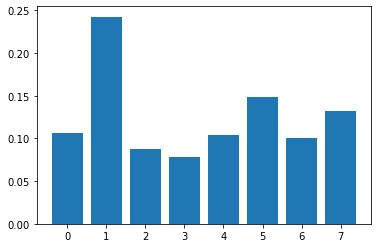

In [ ]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [ ]:
dataset.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [ ]:
X =  dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]

In [ ]:
model = XGBClassifier()

In [ ]:
model.fit(X, y)

[18:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
df  = pd.DataFrame(data = model.feature_importances_ ,columns=['feature_importnace'] ,index=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
df

,feature_importnace
Pregnancies,0.106212
Glucose,0.242402
BloodPressure,0.088034
SkinThickness,0.078182
Insulin,0.103819
BMI,0.148673
DiabetesPedigreeFunction,0.100592
Age,0.132086


In [ ]:
df.sort_values(by='feature_importnace', ascending=False)

,feature_importnace
Glucose,0.242402
BMI,0.148673
Age,0.132086
Pregnancies,0.106212
Insulin,0.103819
DiabetesPedigreeFunction,0.100592
BloodPressure,0.088034
SkinThickness,0.078182


In [ ]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()